In [25]:
import tensorflow as tf

# keras의 datasets, layers, models를 이용
from tensorflow.keras import datasets, layers, models,optimizers
from tensorflow.keras.datasets import imdb

import numpy as np
import matplotlib.pyplot as plt

In [14]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 5s 0us/step


In [15]:
# 첫번재 리뷰의 글 text 
# 이미 다 벡터로 바뀌어 있다. 각각의 word에 대한 번호라고 생각하면 된다. 
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [16]:
# apple 이라는 단어를 주면 apple: 15 이가 들어있는 셈!, 거꾸로 15번을 주면 apple을 받아야 함
word_index = imdb.get_word_index() # maps words to index, commonly called as w_to_i
reverse_word_index = dict( [ (value, key) for (key, value) in word_index.items()] ) # this is just opposite, i_to_w
decode_review = ' '.join( [reverse_word_index.get(i - 3, '?') for i in train_data[0] ])

1646592/1641221 [==============================] - 0s 0us/step


In [17]:
print(f"Encoded Review: \n {train_data[0]} \n")
print(f"Decoded Review: \n {decode_review} \n")

Encoded Review: 
 [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32] 

Decoded Review: 
 ? this film was just b

In [18]:
# sequences 를 one hot encoding으로 ?
# sequences를 dimension 10000개 짜리로 바꾸는 one hot encoding을 하고자 함
# 10000개짜리 배열을 len(seq)만큼 만드는
def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    # 0으로 셋팅
    for i, sequence in enumerate(sequences):
    # sequences들을 돌면서 [i, sequence]값을 1로 바꾸는 것
    # 이 안에 [1, 14, 22, 16, 43, 530,....]가 들어가 있었다. 가지고 오면서 이미 num_words는 10000개만 가져왔음
    # 처음에는 다 0으로 셋팅 되어있던 것을 ..
        results[i,sequence] = 1.
    return results

In [19]:
x_train = vectorize_sequence(train_data) # mapping one hot encoding to a particular index
x_test = vectorize_sequence(test_data) # mapping one hot encoding to a particular index

In [20]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print(f"A data point appears like {x_train[0]}")
print(f"Actual appears as: {y_train[0]}")

A data point appears like [0. 1. 1. ... 0. 0. 0.]
Actual appears as: 1.0


In [21]:
# Model definition

model = models.Sequential()
# inpout 은 10,000개 output은 16개 
model.add(layers.Dense(16, activation='relu', input_shape=(10000,), name="Input_Layer"))
model.add(layers.Dense(16, activation='relu', name="Hidden_Layer_1"))
# 그래프 기준으로 0보다 크면 p / 아니면 N
model.add(layers.Dense(1, activation='sigmoid', name="Output_Layer"))

In [22]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [23]:
# Review the model

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Dense)          (None, 16)                160016    
_________________________________________________________________
Hidden_Layer_1 (Dense)       (None, 16)                272       
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
# Compiling the model
# 왜 아담을 안썼는지?..hyperparmeter
model.compile(optimizer=optimizers.RMSprop(lr = 0.001),
              loss='binary_crossentropy',
                # binary로 나눴기 때문에
              metrics=['accuracy'])

'''
Using custom losses and metrics
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])
'''

'\nUsing custom losses and metrics\nfrom keras import losses\nfrom keras import metrics\nmodel.compile(optimizer=optimizers.RMSprop(lr=0.001),\nloss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])\n'

In [33]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 109us/sample - loss: 0.0799 - accuracy: 0.9741 - val_loss: 0.3522 - val_accuracy: 0.8822
Epoch 2/20
15000/15000 [==============================] - 1s 78us/sample - loss: 0.0711 - accuracy: 0.9786 - val_loss: 0.3663 - val_accuracy: 0.8816
Epoch 3/20
15000/15000 [==============================] - 1s 82us/sample - loss: 0.0556 - accuracy: 0.9849 - val_loss: 0.3981 - val_accuracy: 0.8774
Epoch 4/20
15000/15000 [==============================] - 1s 76us/sample - loss: 0.0450 - accuracy: 0.9896 - val_loss: 0.4251 - val_accuracy: 0.8706
Epoch 5/20
15000/15000 [==============================] - 1s 79us/sample - loss: 0.0380 - accuracy: 0.9905 - val_loss: 0.4464 - val_accuracy: 0.8753
Epoch 6/20
15000/15000 [==============================] - 1s 78us/sample - loss: 0.0302 - accuracy: 0.9932 - val_loss: 0.4762 - val_accuracy: 0.8728
Epoch 7/20
15000/15000 [==============================]

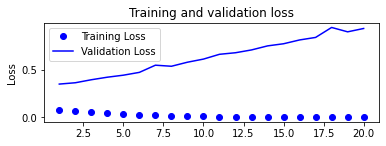

In [40]:
history_dict = history.history
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(1)
plt.subplot(211)
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.legend()

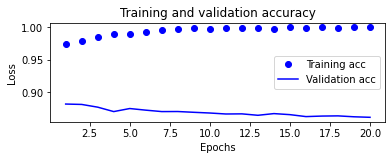

In [41]:
plt.subplot(212)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [43]:
# Running Predict
model.fit(x_train, y_train, epochs=20, batch_size=512)
results = model.evaluate(x_test,y_test)

Train on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 1s 55us/sample - loss: 0.2614 - accuracy: 0.9438
Epoch 2/20
25000/25000 [==============================] - 1s 51us/sample - loss: 0.1427 - accuracy: 0.9582
Epoch 3/20
25000/25000 [==============================] - 1s 52us/sample - loss: 0.1119 - accuracy: 0.9668
Epoch 4/20
25000/25000 [==============================] - 1s 52us/sample - loss: 0.0906 - accuracy: 0.9738
Epoch 5/20
25000/25000 [==============================] - 1s 52us/sample - loss: 0.0733 - accuracy: 0.9785
Epoch 6/20
25000/25000 [==============================] - 1s 51us/sample - loss: 0.0592 - accuracy: 0.9827
Epoch 7/20
25000/25000 [==============================] - 1s 53us/sample - loss: 0.0476 - accuracy: 0.9866
Epoch 8/20
25000/25000 [==============================] - 1s 52us/sample - loss: 0.0373 - accuracy: 0.9900
Epoch 9/20
25000/25000 [==============================] - 1s 51us/sample - loss: 0.0291 - accuracy: 0.9930
Epoch 10/20
25

In [44]:
results

[1.4645268909877538, 0.84816]